- N이 20만이므로 $O(N^2)$으로 풀 수 없다. 적어도 $O(N \log N)$으로 풀어야 한다.

### 풀이
- 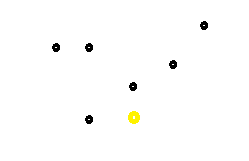
- 별이 위와같이 배치돼있다고 했을 때, 노란색으로 된 별 기준으로 별자리를 만들 수 있는 개수는 다음과 같다.
- 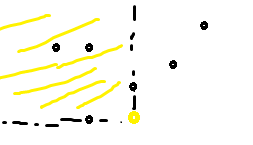
- 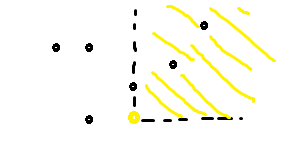
- 각 두 구간의 별들의 개수를 곱하면 된다. 이때 같은 축에 있는 별들은 제외된다는 점에 유의하자.
- 5419(북서풍) 때와 비슷한 풀이로 이번엔 위에서 아래로 스위핑하되, 세그먼트 트리의 업데이트는 y축이 변할 때에만 수행한다.
  - 같은 y축에 존재하는 별들은 list에 저장해놓고 y축이 변할 때 한꺼번에 업데이트한다 ( 이를 batch라고 하는듯 하다 )

In [ ]:
import io, os, sys
input=io.BytesIO(os.read(0,os.fstat(0).st_size)).readline

class ST:
  def __init__(self, L, default, f):
    self._def = default
    self._f = f
    self._len = len(L)
    self._size = _size = 1 << (self._len - 1).bit_length()

    self.L = [default] * (2 * _size)
    self.L[_size:_size + self._len] = L
    for i in reversed(range(_size)):
      self.L[i] = f(self.L[i + i], self.L[i + i + 1])

  def __delitem__(self, i):
    self[i] = self._def

  def __getitem__(self, i):
    return self.L[i + self._size]

  def __setitem__(self, i, v):
    i += self._size
    self.L[i] = v
    i >>= 1
    while i:
      self.L[i] = self._f(self.L[2 * i], self.L[2 * i + 1])
      i >>= 1

  def __len__(self):
    return self._len

  def query(self, s, e):
    s += self._size
    e += self._size

    l = r = self._def
    while s < e: 
      if s & 1:
        l = self._f(l, self.L[s])
        s += 1
      if e & 1:
        e -= 1
        r = self._f(self.L[e], r)
      s >>= 1
      e >>= 1

    return self._f(l, r)

def sol():
  N = int(input())
  MAX = 2 * 10**5
  MOD = 10 ** 9 + 7
  L = []
  for _ in range(N):
    L.append([*map(int, input().split())])
  
  L.sort(key= lambda x: (-x[1], x[0]))

  answer = 0
  st = ST([0] * (MAX * 2 + 1), 0, lambda x, y: x + y)
  last_y = L[0][1]
  tmp = []
  for x, y in L:
    x += MAX #원점 기준으로 이동
    if y != last_y:
      while tmp : #수평선에 포함됐던 별들을 한번에 추가(batch)
        st[tmp.pop()] += 1 
      last_y = y
    tmp.append(x)

    a = st.query(0, x)
    b = st.query(x+1, MAX*2+1)
    answer += (a * b) % MOD
  
  sys.stdout.write(str(answer % MOD) + '\n')

sol()

- `tmp.append(x)`부분을 잘못 처리해서 디버깅이 조금 오래걸렸다